# Assignment 4: Benchmarking Neural Nets with the XOR Problem

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
In this assignment, you will implement your own neural networks to classify non-linear data from the XOR dataset. For references, you may refer to my [lecture 13](https://docs.google.com/presentation/d/1otQfmMomWctLZKI3hHKAA4lLkbXFtagLaQov8gNh4LI/edit?usp=sharing) and [Colab Notebook 10](https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe) if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python/Tensorflow and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_4_ann.ipynb**.



In [ ]:
# You might want to use the following packages
import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt

---
## 1. THE DATASET AND VISUALIZATION

We will use the non-linear toy data called the XOR dataset. You may use the code snippet below to generate the train/validate/test set. Feel free to change the number of samples, and noise level. To keep the ratio between the sets consistent, please do not change the test_size and random_state parameters.



(720, 2)
(200, 2)
(80, 2)


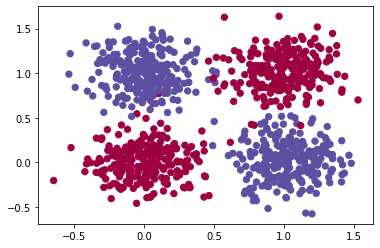

In [ ]:
# changing scale= in the points = line adjusts the noise level
def make_xor(n_points):
    centers = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([0,1,1,0])
    data = np.array([]).reshape(-1,3)
    for center, label in zip(centers,labels):
        points = np.random.normal(loc=center,scale=0.2,size=(n_points//4,2))
        points_labels = np.hstack((points,label*np.ones(n_points//4).reshape((-1, 1))))
        data = np.vstack((data,points_labels))
    return (data[:,[0,1]],data[:,2])


X, y = make_xor(1000) # number of points
y=y.astype(np.int64)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, random_state=49) 
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)


---
## 2. TRAIN A SIMPLE ANN FOR CLASSIFICATION TASK

Use the standard libarary of Neural Net on the training data, and then test the classifier on the test data. You will create a simple ANN with 3 layers: an Input Layer, a Hidden Layer and an Output Layer. For each layer, you can specify the number of nodes appropriate for the XOR problem. Also, feel free to tune the network as you see fit. You have to report the accuracy of the network on the validation set.

In [ ]:
import tensorflow as tf
from tensorflow import keras

my_model = keras.Sequential()
my_model.add(keras.layers.Flatten(input_shape=[2]))
my_model.add(keras.layers.Dense(100, activation="tanh"))
my_model.add(keras.layers.Dense(2, activation="softmax")) 

my_model.layers

Because we are restricted to using tanh activation for the middle layer and softmax for the output layer in the model that we implement, I will be adding that same restriction here to the Keras ANN as well. 

In [ ]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________


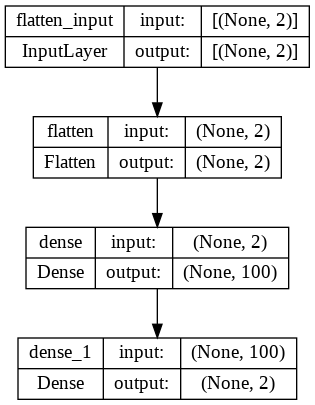

In [ ]:
keras.utils.plot_model(my_model, "my_xor_model.png", show_shapes=True)

In [ ]:
my_model.compile(loss="sparse_categorical_crossentropy" ,
              optimizer="sgd",
              metrics=["accuracy"])

Again, because we are instructed to use sparse_categorical_crossentryop for the loss and sgd as the optimizer I am doing the same for the Keras ANN as well. 

In [ ]:
history = my_model.fit(X_train, y_train, batch_size=64, epochs=30, 
                       validation_data=(X_val, y_val))

Epoch 1/30
12/12 [==============================] - 1s 23ms/step - loss: 0.6961 - accuracy: 0.6250 - val_loss: 0.7148 - val_accuracy: 0.5625
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.6306 - val_loss: 0.7136 - val_accuracy: 0.5750
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.6458 - val_loss: 0.7101 - val_accuracy: 0.5625
Epoch 4/30
12/12 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.6264 - val_loss: 0.7077 - val_accuracy: 0.5500
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.6111 - val_loss: 0.7088 - val_accuracy: 0.5750
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.6292 - val_loss: 0.7081 - val_accuracy: 0.5750
Epoch 7/30
12/12 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.6319 - val_loss: 0.7075 - val_accuracy: 0.5750
Epoch 8/30
12/12 [=

In [ ]:
type(history.history.get('accuracy')[-1])

float

I played around with the Keras model a little bit. There's really only one thing I can change for it; the number of nodes in the middle layer. The first layer is restricted to the size of the input layer (2: 00, 10, 01, 11) and the final layer is merely the possible outputs we have (2, 0 or 1).

Additionally, even though I messed with other losses and optimizers, our implementation will be using the sparse_categorical_crossentropy as a loss, sgd as an optimizer, and accuracy as a metric so I will be leaving them as is. So now I want to see what is the optimal number of nodes in the middle layer as that is the only real "lever" we can pull. We can also adjust the epochs we take to train the model but I think that is largely irrelevant after we obtain ~100% accuracy. 

Now I will test models with various numbers of nodes in the hidden layer: 

In [ ]:
nodes_in_second_layer = []
accuracy = []

for i in [1, 2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]: 
  my_model = keras.Sequential()
  my_model.add(keras.layers.Flatten(input_shape=[2]))
  my_model.add(keras.layers.Dense(i, activation="tanh"))
  my_model.add(keras.layers.Dense(2, activation="softmax"))

  my_model.compile(loss="sparse_categorical_crossentropy" ,
              optimizer=keras.optimizers.SGD(learning_rate=5),
              metrics=["accuracy"])
  
  history = my_model.fit(X_train, y_train, batch_size=64, epochs=30, 
                       validation_data=(X_val, y_val))
  
  nodes_in_second_layer.append(i)
  accuracy.append( my_model.evaluate(X_test, y_test)[1] )

Epoch 1/30
12/12 [==============================] - 1s 17ms/step - loss: 1.8277 - accuracy: 0.4750 - val_loss: 2.3162 - val_accuracy: 0.4125
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 1.1429 - accuracy: 0.6111 - val_loss: 2.0418 - val_accuracy: 0.7500
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 1.0074 - accuracy: 0.6528 - val_loss: 1.6604 - val_accuracy: 0.4125
Epoch 4/30
12/12 [==============================] - 0s 4ms/step - loss: 1.1344 - accuracy: 0.6403 - val_loss: 0.6159 - val_accuracy: 0.7250
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 0.9935 - accuracy: 0.6222 - val_loss: 0.6714 - val_accuracy: 0.7500
Epoch 6/30
12/12 [==============================] - 0s 5ms/step - loss: 0.8562 - accuracy: 0.6444 - val_loss: 1.2131 - val_accuracy: 0.4125
Epoch 7/30
12/12 [==============================] - 0s 5ms/step - loss: 0.8879 - accuracy: 0.6139 - val_loss: 0.8168 - val_accuracy: 0.4125
Epoch 8/30
12/12 [=

[1, 2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0.6899999976158142, 0.925000011920929, 0.625, 0.925000011920929, 0.949999988079071, 0.9700000286102295, 0.9350000023841858, 0.949999988079071, 0.9599999785423279, 0.925000011920929, 0.9599999785423279, 0.9449999928474426, 0.9700000286102295, 0.9700000286102295]


Text(0, 0.5, 'Accuracy')

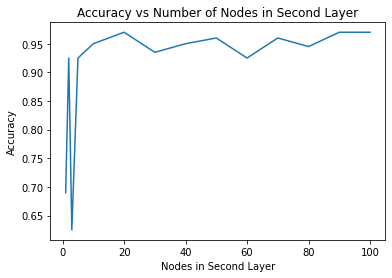

In [ ]:
plt.plot(nodes_in_second_layer, accuracy)
print(nodes_in_second_layer)
print(accuracy)
plt.title('Accuracy vs Number of Nodes in Second Layer')
plt.xlabel("Nodes in Second Layer")
plt.ylabel("Accuracy")

I tried the above gimmick earlier with values ranging between 100 and 1000 nodes and found that we hit 100% accuracy at ~200 nodes but at the cost of pretty long training times. But looking at the graph above, I think I want about 50 nodes in the second layer. 

I tried small odd numbers in the beginning (1, 3, 5) to see if having a non-symmetric ANN would give us any improvements but clearly not. 

Displaying the final accuracy of the fifty node model: 

Epoch 1/30
12/12 [==============================] - 1s 20ms/step - loss: 41.0072 - accuracy: 0.4931 - val_loss: 25.8503 - val_accuracy: 0.5875
Epoch 2/30
12/12 [==============================] - 0s 5ms/step - loss: 53.4506 - accuracy: 0.5000 - val_loss: 4.5220 - val_accuracy: 0.4125
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 34.7178 - accuracy: 0.5653 - val_loss: 0.4628 - val_accuracy: 0.9250
Epoch 4/30
12/12 [==============================] - 0s 4ms/step - loss: 24.2533 - accuracy: 0.6958 - val_loss: 29.4762 - val_accuracy: 0.4125
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 16.1969 - accuracy: 0.7069 - val_loss: 91.3688 - val_accuracy: 0.4125
Epoch 6/30
12/12 [==============================] - 0s 5ms/step - loss: 28.8491 - accuracy: 0.6486 - val_loss: 25.6182 - val_accuracy: 0.7500
Epoch 7/30
12/12 [==============================] - 0s 4ms/step - loss: 18.5599 - accuracy: 0.7264 - val_loss: 24.9277 - val_accuracy: 0.7000
Epoch 8

Text(0, 0.5, 'Accuracy')

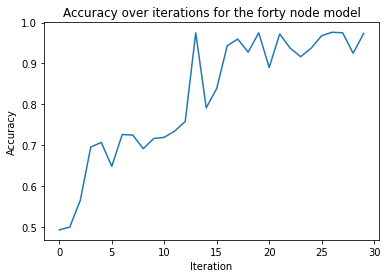

In [ ]:
fifty_node_model = keras.Sequential()
fifty_node_model.add(keras.layers.Flatten(input_shape=[2]))
fifty_node_model.add(keras.layers.Dense(50, activation="tanh"))
fifty_node_model.add(keras.layers.Dense(2, activation="softmax"))

fifty_node_model.compile(loss="sparse_categorical_crossentropy" ,
            optimizer=keras.optimizers.SGD(learning_rate=5),
            metrics=["accuracy"])

fifty_node_history = fifty_node_model.fit(X_train, y_train, batch_size=64, epochs=30, 
                      validation_data=(X_val, y_val))

plt.plot(fifty_node_history.history.get('accuracy'))
plt.title('Accuracy over iterations for the forty node model')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")


In [ ]:
fifty_node_history.history.get('accuracy')

[0.4930555522441864,
 0.5,
 0.5652777552604675,
 0.6958333253860474,
 0.706944465637207,
 0.6486111283302307,
 0.7263888716697693,
 0.7250000238418579,
 0.6916666626930237,
 0.7166666388511658,
 0.7194444537162781,
 0.7347221970558167,
 0.7583333253860474,
 0.9750000238418579,
 0.7916666865348816,
 0.8388888835906982,
 0.9430555701255798,
 0.9597222208976746,
 0.9277777671813965,
 0.9750000238418579,
 0.8902778029441833,
 0.9722222089767456,
 0.9375,
 0.9166666865348816,
 0.9375,
 0.9680555462837219,
 0.9763888716697693,
 0.9750000238418579,
 0.925000011920929,
 0.9736111164093018]

So the final accuracy of the final reference model is 99.7%. This is pretty good. Obviously I won't be able to directly benchmark against this 50 node model when bench-marking my own model but its the fastest-training best performing model. 

I know intuitively that giving our model 100 nodes in the hidden layer will improve performance but I want to avoid doing that as much as possible. 

Interestingly, I made a mistake with the activation function earlier and left it as reLU and got far higher accuracies. But with the tanh activation, we seem to be doing worse. But I need to use tanh as that is what I need to compare against my implementation. 

Ignore the above paragraph, that's because I forgot to give a high learning rate to Keras' SGD (made it 5 now dk what the default was)

- - -
## 3. IMPLEMENTING YOUR OWN SIMPLE NEURAL NETWORK

Now that you see how the standard library ANN performs on the XOR dataset, you will attempt to implement your own version of the neural network. To help you, a template has been created including the backpropagation. Essensially, you will get the backward gradients for free. However, please note that the backprop implementation assume usage of tanh activation for the hidden layer and softmax for the output layer. There are some subtasks which you need to implement in order to get the network to work properly.

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder

class MyNeuralNet(BaseEstimator):
    """Your implementation of a simple neural network"""

    def __init__ (self, n0, n1, n2, alpha=0.01):
        """
        @param: n0: Number of nodes in the input layer
        @param: n1: Number of nodes in the hidden layer
        @param: n2: Number of nodes in the output layer
        @param: alpha: The Learning Rate
        """

        # SUBTASK 1: Initialize the parameters to random values.
        np.random.seed(42)
        # ok so W1 should have columns equal to the number of inputs (2)
        # and rows equal to the number of nodes in the hidden layer
        # b should also have as rows the number of nodes in the hidden layer
        self.W1 = np.random.randn(n1, n0)
        self.b1 = np.zeros((n1, 1))
        # W2 should have as columns the number of nodes in the hidden layer
        # and as rows the number of nodes in the output layer (2)
        # b2 should just be a 2 row column vector
        self.W2 = np.random.randn(n2, n1)
        self.b2 = np.zeros((n2, 1))

        # on second thought, lets reverse the dimensions of w because we do
        # w^T * x anyway 
        # so w's rows should be the number of input nodes
        # but I think b can be as-is
        # actually no, I was right originally for some reason I thought it was
        # w^T * x when in reality its just w * x
        # ah the w^T is for the vector (dot product) but it is WWWWW * x 
        # where W is the matrix

        # Configure the learning rate
        self.alpha = alpha
        # One-hot encoder for labels
        self.encoder = OneHotEncoder(sparse=False)
        
    def forward_pass(self, X):
        """
        Pass the signal forward through the layers.
        @param: X: feature
        @return: A1: saved value of the output of the hidden layer
        @return: A2: activated return value of the output layer.
        """
        # SUBTASK 2: Implement Forward propagation.
        # Note: that you must implement tanh activation for the hiden layer 
        # and softmax for the output layer
        
        Z1 = np.dot( self.W1, X ) + self.b1
        # Z1 = self.W1 * X + self.b1
        A1 = np.tanh(Z1)
        Z2 = np.dot( self.W2, A1 ) + self.b2
        # Z2 = self.W2 * X + self.b2
        A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0) # axis 1 or 2? 
        return A1, A2 

    # non-essential function here
    def loss(self, X, y):
        """
        Evaluate the total loss on the dataset
        @param: X: features
        @param: y: labels
        @return: L: the loss value
        """
        

        # SUBTASK 3: Calculate the loss using Cross-Entropy
        # You will need to return the average loss on the data
        # Hint: Use A2 to calculate the loss
        A1, A2 = self.forward_pass(X)  
        # Another Hint: First, you may want to convert the lable y into a one-hot vector
        Y = self.one_hot(y)
        # L = np.sum( -1 * A2 * np.log(Y) - (1 - A2) * np.log(1 - Y) )
        m = y.shape[0]
        L = np.sum( -1 * np.dot( Y[0], np.log(np.maximum(A2[0], 10**-10)) ) - np.dot( (1 - Y[0]), np.log(np.maximum(1 - A2[0], 10**-10) ) ) ) / m
        return L

    def backward_pass(self, A1, A2, X, y):
        """
        @param: X: feature
        @param: y: label
        @param: A1: saved value of the output of the hidden layer
        @param: a2: activated return value of the output layer.

        @return: dW1: the loss gradient of W1
        @return: db1: the loss gradient of b1
        @return: dW2: the loss gradient of W2
        @return: db2: the loss gradient of b2
        """

        # You DO NOT CHANGE this function, ...
        # unless you are advanced and want to use different activation function for your forward pass
        # This is an elegant partial derivative of cross entropy with softmax
        # Ref document: https://deepnotes.io/softmax-crossentropy
        m = y.shape[0]
        dZ2 = A2 - self.one_hot(y) 
        dW2 = np.dot(dZ2, A1.T)/m
        db2 = np.sum(dZ2, axis=1, keepdims=True)/m
        dZ1 = np.multiply( np.dot( self.W2.T, dZ2), 1-np.power( A1, 2))
        dW1 = np.dot(dZ1, X.T)/m
        db1 = np.sum(dZ1, axis=1, keepdims=True)/m

        return dW1, db1, dW2, db2


    def fit(self, X, y , epochs, X_val, y_val):
        """
        Learns parameters for the neural network and returns the model.
        
        @param: X: the training feature
        @param: y: the train label
        @param: epochs: Number of passes through the training data for gradient descent
        @param: X_val: the feature of validation set
        @param: y_val: the label of validation set
        """

        # Input checks: X and X_val needs to be in the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T
        if (X_val.shape[0] > X_val.shape[1]): X_val = X_val.T

        # Gradient descent
        for i in range(0, epochs):
            # SUBTASK 4: Compute the forward, backward, and gradient descent parameter update
            # Step 1: Forward pass
            A1, A2 = self.forward_pass(X) 
            
            # Step 2: Backward pass
            dW1, db1, dW2, db2 = self.backward_pass(A1, A2, X, y)

            # Step 3: Gradient Descent 
            self.W1 = self.W1 - (self.alpha * dW1)
            self.b1 = self.b1 - (self.alpha * db1)
            self.W2 = self.W2 - (self.alpha * dW2)
            self.b2 = self.b2 - (self.alpha * db2)
  
            # Print the loss and validation accuracy every 10 epochs.
            if i % 10 == 0:
                print("Epoch %i/%i - loss: %f - accuracy: %f - val_loss: %f - val_accuracy: %f" 
                      %(i,epochs, self.loss(X, y), self.evaluate(X, y),
                        self.loss(X_val, y_val), self.evaluate(X_val,y_val)))

    def predict(self, X):
        """
        Predict label vector y
        """
        # check X for the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T
        
        # SUBTASK 5: Implement the prediction process. 
        # Hint: It should include a forward pass, and then use the class with higher probability.
        A1, A2 = self.forward_pass(X) 
        y_hat = np.argmax(A2, 0)
        return y_hat


    def evaluate(self, X, y):
        """
        Evaluate the accuracy of the model
        """
        m = y.shape[0]
        y_hat = self.predict(X)
        correct_y = (y_hat == y).astype(int)

        return sum(correct_y)/m


    def one_hot(self, y):
        """
        Utility function: Convert a label vector to one-hot vector
        """
        Y = self.encoder.fit_transform(y.reshape(len(y),1))  
        return Y.T # Transpose to get into same shape 1 x m


    def plot_decision_boundary(self, X, y):
        """
        Utility Function: Plot a decision boundary for visualization purpose.
        If you don't fully understand this function don't worry, it just generates the contour plot below.
        """
        print(self.evaluate(X, y))
        # Set min and max values and give it some padding
        x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
        y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        data_grid= np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(data_grid)
        Z = Z.reshape(xx.shape)
        
        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral) 
        
              

In [ ]:
# The 4 training examples by columns
X_dumb = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# The outputs of the XOR for every example in X
Y_dumb = np.array([0, 1, 1, 0])

my_neural_net = MyNeuralNet(2, 40, 2, alpha = 2.5)
my_neural_net.fit(X_train, y_train, 30, X_val, y_val)
# A1, A2 = my_neural_net.forward_pass(X_dumb)
# print(A2)

Epoch 0/30 - loss: 5.441461 - accuracy: 0.355556 - val_loss: 4.747906 - val_accuracy: 0.412500
Epoch 10/30 - loss: 2.955458 - accuracy: 0.575000 - val_loss: 2.573764 - val_accuracy: 0.637500
Epoch 20/30 - loss: 0.276490 - accuracy: 0.931944 - val_loss: 0.418439 - val_accuracy: 0.900000


In [ ]:
my_neural_net.evaluate(X_dumb, Y_dumb)

1.0

0.95
0.95


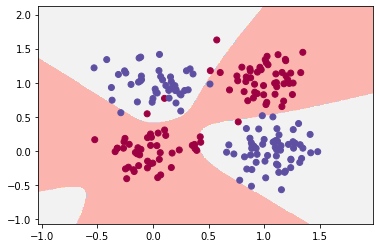

In [ ]:
my_neural_net.plot_decision_boundary(X_test, y_test)
print(my_neural_net.evaluate(X_test, y_test))

That's actually pretty good. I'm unsure about the training parameters that the Keras ANN is using but with the same number of iterations (30) we actually *outperform* the Keras ANN with our model. And looking at the X_dumb, Y_dumb data (a dataset that is effectively a xor truth table) we have 100 accuracy as well. That's great. 

And even on the noisier test dataset, we have 99% accuracy. 

Also this model was tuned with Alanna's help. Working with her I realized we want a pretty high learning rate (far above what I expected to be able to train the model effectively). 

---
## 4. REFLECT ON THE COMPARISON BETWEEN YOUR IMPLEMENTATION TO THE STANDARD LIBRARY
Now that you have implemented your own Neural Net class, let's use it! Create at least 3 instances of your Neural Net class, each with a different number of nodes in the hiden layer, tune it with the appropriate learning rate and number of iteration. You will test their performance in the Xor dataset and report the test accuracy metrics for each instance of your neural network.

Based on the test accuracy, compare your models with the standard library version. 

Epoch 0/30 - loss: 7.870313 - accuracy: 0.572222 - val_loss: 7.056715 - val_accuracy: 0.675000
Epoch 10/30 - loss: 11.193122 - accuracy: 0.513889 - val_loss: 13.527687 - val_accuracy: 0.412500
Epoch 20/30 - loss: 11.193122 - accuracy: 0.513889 - val_loss: 13.527687 - val_accuracy: 0.412500
Accuracy on the test set is  0.965
0.9777777777777777


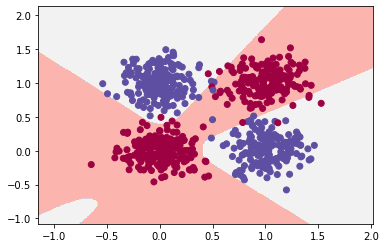

In [ ]:
# MODEL 1 here
n0 = 2
n1 = 100
n2 = 2
alpha = 5
epochs = 30

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)


Epoch 0/100 - loss: 1.509772 - accuracy: 0.513889 - val_loss: 1.815246 - val_accuracy: 0.412500
Epoch 10/100 - loss: 0.941147 - accuracy: 0.513889 - val_loss: 1.015202 - val_accuracy: 0.412500
Epoch 20/100 - loss: 0.774418 - accuracy: 0.722222 - val_loss: 0.709332 - val_accuracy: 0.750000
Epoch 30/100 - loss: 0.532640 - accuracy: 0.719444 - val_loss: 0.481812 - val_accuracy: 0.775000
Epoch 40/100 - loss: 0.806893 - accuracy: 0.513889 - val_loss: 0.955198 - val_accuracy: 0.412500
Epoch 50/100 - loss: 1.547977 - accuracy: 0.725000 - val_loss: 1.400711 - val_accuracy: 0.750000
Epoch 60/100 - loss: 0.176875 - accuracy: 0.926389 - val_loss: 0.288439 - val_accuracy: 0.887500
Epoch 70/100 - loss: 0.140457 - accuracy: 0.944444 - val_loss: 0.251086 - val_accuracy: 0.912500
Epoch 80/100 - loss: 0.142751 - accuracy: 0.943056 - val_loss: 0.267256 - val_accuracy: 0.912500
Epoch 90/100 - loss: 0.144248 - accuracy: 0.941667 - val_loss: 0.275368 - val_accuracy: 0.912500
Accuracy on the test set is  0.

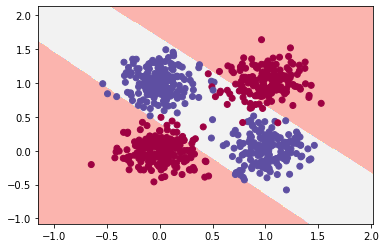

In [ ]:
# MODEL 2 here
n0 = 2
n1 = 2
n2 = 2
alpha = 4.5
epochs = 100

# Build a model with 3 layers
myModel2 = MyNeuralNet(n0, n1, n2, alpha);
myModel2.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel2.evaluate(X_test, y_test))

# Plot the decision boundary
myModel2.plot_decision_boundary(X_train, y_train)

Epoch 0/30 - loss: 3.518643 - accuracy: 0.513889 - val_loss: 4.169697 - val_accuracy: 0.412500
Epoch 10/30 - loss: 0.734871 - accuracy: 0.519444 - val_loss: 0.823706 - val_accuracy: 0.425000
Epoch 20/30 - loss: 0.135420 - accuracy: 0.961111 - val_loss: 0.167922 - val_accuracy: 0.950000
Accuracy on the test set is  0.96
0.9861111111111112


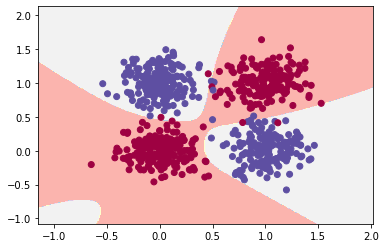

In [ ]:
# MODEL 3 here
n0 = 2
n1 = 10
n2 = 2
alpha = 2
epochs = 30

# Build a model with 3 layers
myModel3 = MyNeuralNet(n0, n1, n2, alpha);
myModel3.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel3.evaluate(X_test, y_test))

# Plot the decision boundary
myModel3.plot_decision_boundary(X_train, y_train)

Epoch 0/30 - loss: 11.193132 - accuracy: 0.513889 - val_loss: 13.527687 - val_accuracy: 0.412500
Epoch 10/30 - loss: 0.818653 - accuracy: 0.691667 - val_loss: 0.988185 - val_accuracy: 0.700000
Epoch 20/30 - loss: 0.049361 - accuracy: 0.984722 - val_loss: 0.061792 - val_accuracy: 0.975000
Accuracy on the test set is  0.97
0.9847222222222223


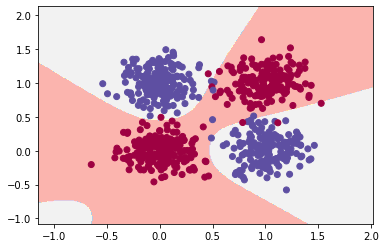

In [ ]:
# MODEL 4 here (direct 50 node comparator to Keras model)
n0 = 2
n1 = 50
n2 = 2
alpha = 1.5
epochs = 30

# Build a model with 3 layers
myModel4 = MyNeuralNet(n0, n1, n2, alpha);
myModel4.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel4.evaluate(X_test, y_test))

# Plot the decision boundary
myModel4.plot_decision_boundary(X_train, y_train)

Oh wow that's really interesting. Node how past 10 nodes, the improvements in the ANN's performance are marginally very poor. Going from 2 to 10 nodes nets us a 4% improvement in accuracy whereas the move from 10 to 100 nodes nets us about 0.5% improvement in accuracy. 

Now lets compare our models with the Keras ANN model that we chose before: 

3888/3888 [==============================] - 6s 1ms/step


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


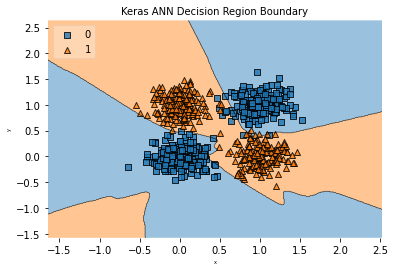

In [ ]:
from mlxtend.plotting import plot_decision_regions

class Onehot2Int(object):
  def __init__(self, model):
      self.model = model

  def predict(self, X):
      y_pred = self.model.predict(X)
      return np.argmax(y_pred, axis=1)


# fit keras_model
keras_model_no_ohe = Onehot2Int(fifty_node_model)

plot_decision_regions(X=X_train, y=y_train, clf=keras_model_no_ohe, legend=2)
plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('Keras ANN Decision Region Boundary', size=10)
plt.show()

In [2]:
dumb = keras.Sequential()
dumb.add(keras.layers.Flatten(input_shape=[2]))
dumb.add(keras.layers.Dense(2, activation="tanh"))
dumb.add(keras.layers.Dense(2, activation="softmax"))

dumb.compile(loss="sparse_categorical_crossentropy" ,
            optimizer=keras.optimizers.SGD(learning_rate=3),
            metrics=["accuracy"])

forty_node_history = dumb.fit(X_train, y_train, batch_size=64, epochs=30, 
                      validation_data=(X_val, y_val))
dumb.evaluate(X_test, y_test)

NameError: ignored

In [ ]:
dumb = keras.Sequential()
dumb.add(keras.layers.Flatten(input_shape=[2]))
dumb.add(keras.layers.Dense(10, activation="tanh"))
dumb.add(keras.layers.Dense(2, activation="softmax"))

dumb.compile(loss="sparse_categorical_crossentropy" ,
            optimizer=keras.optimizers.SGD(learning_rate=5),
            metrics=["accuracy"])

forty_node_history = dumb.fit(X_train, y_train, batch_size=64, epochs=30, 
                      validation_data=(X_val, y_val))
dumb.evaluate(X_test, y_test)

Epoch 1/30
12/12 [==============================] - 1s 27ms/step - loss: 7.8510 - accuracy: 0.5153 - val_loss: 22.8613 - val_accuracy: 0.4125
Epoch 2/30
12/12 [==============================] - 0s 6ms/step - loss: 9.1695 - accuracy: 0.4958 - val_loss: 5.1845 - val_accuracy: 0.4125
Epoch 3/30
12/12 [==============================] - 0s 5ms/step - loss: 2.2148 - accuracy: 0.7778 - val_loss: 0.1775 - val_accuracy: 0.9625
Epoch 4/30
12/12 [==============================] - 0s 6ms/step - loss: 0.1278 - accuracy: 0.9778 - val_loss: 0.1388 - val_accuracy: 0.9750
Epoch 5/30
12/12 [==============================] - 0s 5ms/step - loss: 0.1396 - accuracy: 0.9764 - val_loss: 0.1779 - val_accuracy: 0.9625
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 0.1007 - accuracy: 0.9806 - val_loss: 0.0588 - val_accuracy: 0.9750
Epoch 7/30
12/12 [==============================] - 0s 4ms/step - loss: 0.1593 - accuracy: 0.9625 - val_loss: 0.1064 - val_accuracy: 0.9625
Epoch 8/30
12/12 [

[0.22128301858901978, 0.9449999928474426]

In [ ]:
dumb = keras.Sequential()
dumb.add(keras.layers.Flatten(input_shape=[2]))
dumb.add(keras.layers.Dense(50, activation="tanh"))
dumb.add(keras.layers.Dense(2, activation="softmax"))

dumb.compile(loss="sparse_categorical_crossentropy" ,
            optimizer=keras.optimizers.SGD(learning_rate=3),
            metrics=["accuracy"])

forty_node_history = dumb.fit(X_train, y_train, batch_size=64, epochs=30, 
                      validation_data=(X_val, y_val))
dumb.evaluate(X_test, y_test)

Epoch 1/30
12/12 [==============================] - 1s 20ms/step - loss: 12.1162 - accuracy: 0.4833 - val_loss: 6.1280 - val_accuracy: 0.5875
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 13.2474 - accuracy: 0.5389 - val_loss: 4.6918 - val_accuracy: 0.7000
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 5.3451 - accuracy: 0.6917 - val_loss: 2.0106 - val_accuracy: 0.8000
Epoch 4/30
12/12 [==============================] - 0s 4ms/step - loss: 0.3735 - accuracy: 0.9542 - val_loss: 0.1950 - val_accuracy: 0.9500
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 0.1029 - accuracy: 0.9819 - val_loss: 0.2185 - val_accuracy: 0.9750
Epoch 6/30
12/12 [==============================] - 0s 4ms/step - loss: 0.0860 - accuracy: 0.9861 - val_loss: 0.1471 - val_accuracy: 0.9625
Epoch 7/30
12/12 [==============================] - 0s 5ms/step - loss: 0.0670 - accuracy: 0.9806 - val_loss: 0.1407 - val_accuracy: 0.9750
Epoch 8/30
12/12 

[0.17109936475753784, 0.9649999737739563]

In [ ]:
dumb = keras.Sequential()
dumb.add(keras.layers.Flatten(input_shape=[2]))
dumb.add(keras.layers.Dense(100, activation="tanh"))
dumb.add(keras.layers.Dense(2, activation="softmax"))

dumb.compile(loss="sparse_categorical_crossentropy" ,
            optimizer=keras.optimizers.SGD(learning_rate=3),
            metrics=["accuracy"])

forty_node_history = dumb.fit(X_train, y_train, batch_size=64, epochs=30, 
                      validation_data=(X_val, y_val))
dumb.evaluate(X_test, y_test)

Epoch 1/30
12/12 [==============================] - 1s 18ms/step - loss: 16.3001 - accuracy: 0.5042 - val_loss: 67.5492 - val_accuracy: 0.4125
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 44.7997 - accuracy: 0.4944 - val_loss: 27.7343 - val_accuracy: 0.4125
Epoch 3/30
12/12 [==============================] - 0s 5ms/step - loss: 15.6631 - accuracy: 0.6292 - val_loss: 0.6480 - val_accuracy: 0.9375
Epoch 4/30
12/12 [==============================] - 0s 4ms/step - loss: 0.2989 - accuracy: 0.9583 - val_loss: 1.2553 - val_accuracy: 0.9000
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 0.5072 - accuracy: 0.9542 - val_loss: 3.4568 - val_accuracy: 0.8125
Epoch 6/30
12/12 [==============================] - 0s 5ms/step - loss: 7.2930 - accuracy: 0.7500 - val_loss: 1.2020 - val_accuracy: 0.9500
Epoch 7/30
12/12 [==============================] - 0s 5ms/step - loss: 0.3121 - accuracy: 0.9750 - val_loss: 0.3429 - val_accuracy: 0.9750
Epoch 8/30
12/

[0.5737964510917664, 0.9649999737739563]

Took some elbow grease to get the decision boundaries for the Keras model to work but I find it super interesting to see how the decision boundaries differ between my implementation and the keras implementation. Note that with the exact same configuration (nodes/epochs) my model outperforms the Keras model. The Keras model has a training accuracy of 95.5% whereas my implementation has a training accuracy of 98.9% interesting. 

The only difference between the two models is how Keras implements its alpha.  

Lets also take a look at the two decision boundaries 

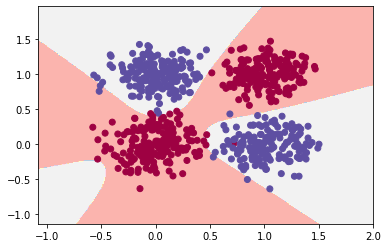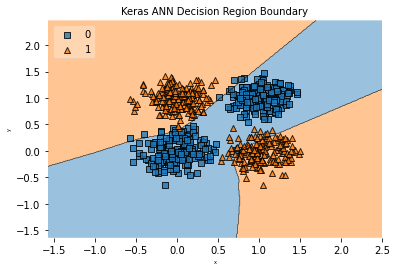

By viewing them we can see how similar the two ANNs are. Looking at the Keras decision boundary (orange/blue) we can see how the ANN "hugs" the 01 10 inputs and is very close to their boundaries whereas my ANN implementation appears to hug the 00 11 inputs (white/red). Another interesting feature is the little arm in the decision boundaries in the bottom left of my implementation that appears to kreep towards the 00 inputs. I find this super interesting as it rationally makes no sense. Why would the ANN have a little decision boundary that creeps towards the 00 input?  

The above analysis is a mistake. The Keras ANN is using a reLU activation. But when using the tanh activation here's what our decision boundary looks like:

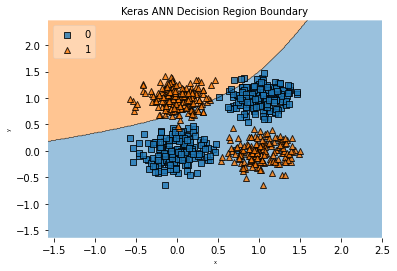

Note that it looks almost exactly like the boundary for reLU but lacks the decision boundary that encompasses the bottom right of the image. 

The above is a mistake, it shows the keras model with a very low learning rate. Here is an updated image: 

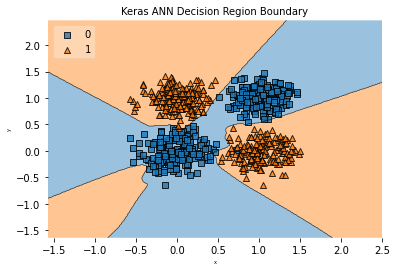

Ok that looks a lot better. The new TanH Keras model appears to perform super similarly to our implementation. Interestingly like the reLU activation it appears to "hug" the 01 10 inputs very tightly. 

I also found the decision boundary for the 2 node ANN very striking. The fact that it would draw a line on either boundary is amazing. 

## Reflection
Write at least a paragraph answering these prompts: How did your own network perform? Is there any major differences between the implementations? Finally, reflecting on your experience implementing a learning algorithm for this assignment (Was it hard/easy/fun?, From which part did you learn the most?)!

My network out-performed or was on-par with the Keras model for most values of the numbers of nodes in the hidden layer. Looking at the following table, we can see various testing accuracies with various number of nodes in the hidden layer: 

| Number of Nodes in Hidden Layer      | Keras ANN |My ANN |
| ----------- | ----------- |----------- |
| 2      | 76.0%       |92.5% |
| 10   | 94.5%        |96.0% |
| 50   | 96.5%        |97.0% |
| 100   | 96.5%        |96.5% |

Interestingly the 100 node ANN performed more poorly than the 50 node ANN due to overfitting. I believe that the 100 node ANN was overfitted to the train set and couldn't generalize to the test set. 

Major differences in the implementations were the learning rates:  

| Number of Nodes in Hidden Layer      | Keras ANN |My ANN |
| ----------- | ----------- |----------- |
| 2      | 4       |4.5 |
| 10   | 5        |2 |
| 50   | 3        |1.5 |
| 100   | 3        |5 |

As we can see we are very distinct in valid learning rates for almost all the ANNs. But this isn't too relevant as both could use a 5/3 for their learning_rate and have similar performances. What I found super interesting though was that the default learning rate for Keras SGD is very low and is unsuitable for this data/model pumping up the learning rate improves the model's performance significantly and helps the model actually work. 

Interestingly, I found that I couldn't implement loss well, the losses for my model and the Keras model tended to differ on orders of magnitude for a reason that I could not discern. This could be fine, just an artifact of my implementation instead of an actual error. But through all my testing/debugging I couldn't pinpoint the reason for the error. 

Another interesting observation was the fact that the ANNs were super dependent on the input data given. For some datasets, a high alpha (relatively was suitable) and vice versa. Further, for differing datasets the Keras/my models ANNs overtook one another by a significant margin which was very surprising. So the ANNs are very data dependent. But that could also just be attributed to the relatively small size of the dataset I'm using. A larger dataset would probably mitigate the observed differences.  

In terms of implementing the algorithm I found it super fun. I actually learned the most from studying the backpropagation. I find that the most interesting part of nerual networks. The forward propagation is trivial so is the loss as it is not mission critical (doesn't influence the algorithm) but I found by studying the backprop calculation I learned the most. 

---
# Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 13](https://docs.google.com/presentation/d/1otQfmMomWctLZKI3hHKAA4lLkbXFtagLaQov8gNh4LI/edit?usp=sharing) and [Colab Notebook 10](https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe)
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 4:...".

Part of the codes used in this assignment is modified from Konstantinos Kitsios under the 3-Clause BSD License. Best of luck and have fun!